In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
N = 30
h = 1 / N
a = 0.5
b = 0.6
r = 0.2
x0 = 0
y0 = 0
xN = 1
yN = 1

# point initiale (0,0) point finale (1,1)
x_valeus = np.linspace(0,1,N-1)
y_valeus = 1 - (1 - x_valeus)**10


# gradient de R
def Grad_R(x,y):

    Grad_x = np.zeros((N - 1))
    Grad_y = np.zeros((N - 1))
    Indices = (x-a) ** 2 + (y-b) ** 2 <= r ** 2
    Grad_x[Indices] = -2 * h * (x[Indices] - a) * (r**2 - (x[Indices] - a)**2 - (y[Indices] - b)**2)
    Grad_y[Indices] = -2 * h * (y[Indices] - b) * (r**2 - (x[Indices] - a)**2 - (y[Indices] - b)**2)  # le carré ici c'est chaque terme au carré, fait attentenion on n'a pas besoin du produit scalaire
    return Grad_x,Grad_y

Grad_R_x,Grad_R_y = Grad_R(x_valeus,y_valeus)   # test de R

# définition de la matrice A
def create(N):
    A = np.zeros((N-1,N-1))
    A -= np.diag(np.ones(N-2),1)
    A -= np.diag(np.ones(N-2),-1)
    A += 2 * np.eye(N-1)
    return A

# gradient de H
def Grad_H(x,y):
    x_bar = np.zeros((N-1,)) 
    x_bar[-1] = 1
    y_bar = np.zeros((N-1,))
    y_bar[-1] = 1 
    res = np.zeros((2*(N-1),)) 
    Grad_x = np.zeros((N-1))
    Grad_y = np.zeros((N-1))
    A = create(N)

    Grad_x = (A @ x - x_bar) / h    
    Grad_y = (A @ y - y_bar) / h    

    return Grad_x,Grad_y

def Decent_gradient(x_ini,y_ini,eps,tol,tau,IterMax,Grad_H,Grad_R):
    x = x_ini
    y = y_ini
    k = 0

    Grad_H_x, Grad_H_y = Grad_H(x,y)
    Grad_R_x, Grad_R_y = Grad_R(x,y)

    Grad_H_eps_x = Grad_H_x + Grad_R_x / eps
    Grad_H_eps_y = Grad_H_y + Grad_R_y / eps
 
    while(k < IterMax and np.linalg.norm([Grad_H_eps_x, Grad_H_eps_y]) > tol):
        x = x - tau * Grad_H_eps_x
        y = y - tau * Grad_H_eps_y

        Grad_H_x, Grad_H_y = Grad_H(x,y)
        Grad_R_x, Grad_R_y = Grad_R(x,y)
        Grad_H_eps_x = Grad_H_x + Grad_R_x / eps
        Grad_H_eps_y = Grad_H_y + Grad_R_y / eps
        k = k + 1

    if(k == IterMax):
        check = False
    else:
        check = True
    return check,k,(x,y)

# Pénalisation externe : données à modifiers
epsilon = 1/100000
eta_tol = 1e-4
tau = 0.01
Itermax = 5000


CV,Kmaxx,u = Decent_gradient(x_valeus,y_valeus,epsilon ,eta_tol,tau, Itermax,Grad_H,Grad_R)
#print('Convergence ?',CV)
#print('Iteration max = ',Kmaxx)


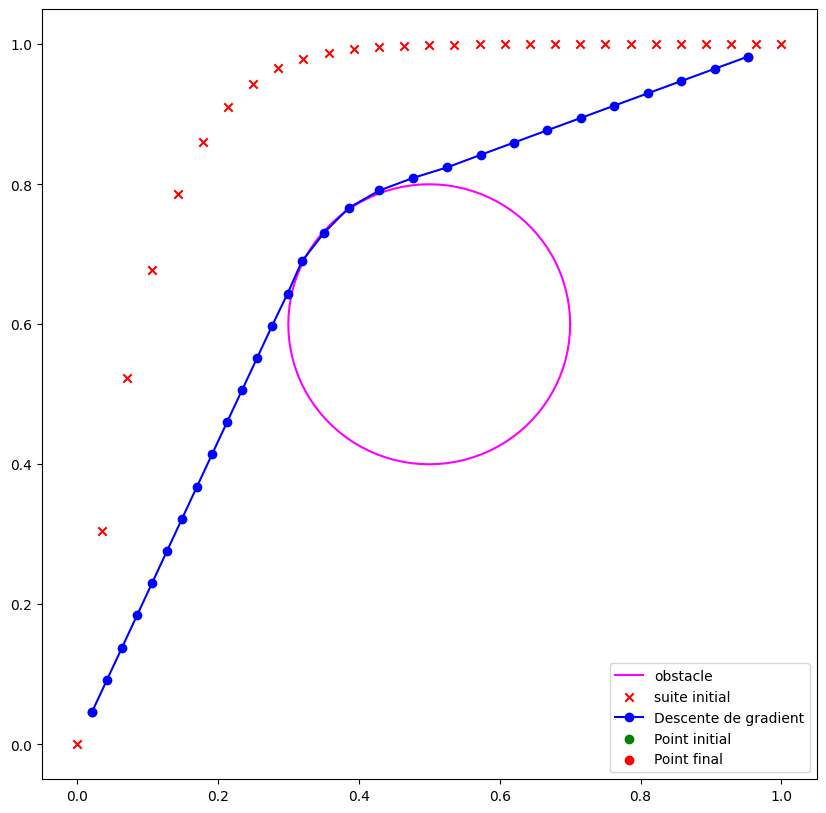

In [6]:
def plot_circle(ax) :
    t = np.linspace(0, 2*np.pi, 101)
    x_circle = r*np.cos(t) + a
    y_circle = r*np.sin(t) + b
    ax.plot(x_circle, y_circle, color='magenta', label='obstacle')

# Crée une nouvelle figure et des axes
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Trace le cercle
plot_circle(ax)

# Extrait les valeurs de x et y de u
x_resultats = u[0]
y_resultats = u[1]
ax.scatter(x_valeus,y_valeus, marker = 'x',label ='suite initial',color ='red')
# Trace le trajet de descente de gradient
ax.plot(x_resultats, y_resultats, marker='o', label='Descente de gradient', color='blue')

# Marque le point initial
ax.scatter(x_resultats[0], y_resultats[0], color='green', label='Point initial')

# Marque le point final
ax.scatter(x_resultats[-1], y_resultats[-1], color='red', label='Point final')

# Ajoute la légende
ax.legend()

# Affiche le graphique
plt.show()
